# Pendulum Search Algorithm 

**Author:** Sebastian Ahumada  
**Date:** June 2022 

**Description:**

The objective of this notebook is to apply the PSA optimization algorithm (for more information, see the paper: https://www.mdpi.com/1999-4893/15/6/214) to the well-known SCP optimization problems, which are set covering problems. In particular, this notebook will work with SCP41, which can be downloaded from the following page: https://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/scp41.txt

## Import Libraries

In [86]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from scipy import special as scyesp
import math
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Classes Definition

In [2]:
### Read problem (instance) class
class Read():
# -*- coding: utf-8 -*-

    def __init__(self,file):
        self.__c = []
        self.__r = []
        self.rows = 0
        self.columns  = 0
        self.LeerInstancia(file)
    
    def get_c(self):
        return self.__c

    def set_c(self, c):
        self.__c = c    
        
    def get_r(self):
        return self.__r

    def set_r(self, r):
        self.__r = r    
    
    def get_rows(self):
        return self.rows
    
    def get_columns(self):
        return self.columns 
    
    def LeerInstancia(self,Instancia):

        self.optimo = self.obtenerOptimo(Instancia)
        Archivo = open(Instancia, "r")

        # Leer Dimensión
        Registro = Archivo.readline().split()
        # print("Dimensiones de la matriz de cobertura: "+str(Registro))
        self.rows = int(Registro[0])            # numero de filas m
        self.columns      = int(Registro[1])    # numero de columnas n
        
        # Leer Costo
        Costos        = []
        Registro      = Archivo.readline()
        ContVariables = 1

        while Registro != "" and ContVariables <= self.columns :
            Valores = Registro.split()
            for Contador in range(len(Valores)):
                Costos.append(int(Valores[Contador]))
                ContVariables = ContVariables + 1
            Registro = Archivo.readline()
        # print("Costos para cada columna: "+str(Costos))
        # print("Cantidad de costos para cada columna: "+str(Costos.__len__()))



        # Preparar Matriz de Restricciones.
        Restricciones = np.zeros((self.rows,self.columns), dtype=np.int32).tolist()

        # Leer Restricciones    
        ContVariables      = 1
        Fila               = 0

        while Registro != "":

            CantidadValoresUno = int(Registro)
            # print("Cantidad de columnas que cubre la fila "+str(Fila)+": "+str(CantidadValoresUno))
            ContadorValoresUno = 0
            Registro = Archivo.readline()
            
            # print(Registro)
            Registro = Registro.replace('\n','').replace("\\n'",'')

            while Registro != "" and ContadorValoresUno < CantidadValoresUno: 
                Columnas = Registro.split() 
                for Contador in range(len(Columnas)):
                    Columna = int(Columnas[Contador]) - 1
                    Restricciones[Fila][Columna] = 1
                    ContadorValoresUno = ContadorValoresUno + 1
                Registro = Archivo.readline()
            # print("Coberturas para la fila "+str(Fila)+": "+str(Restricciones[Fila]))
            # print("Suma de validacion: "+str(sum(Restricciones[Fila])))
            
            Fila = Fila + 1

            
        Archivo.close()
        self.set_c(Costos)
        self.set_r(Restricciones)   
        # print("Chequeo de cobertura: "+str(Restricciones[0][90]))     


    def obtenerOptimo(self, archivoInstancia):
        orden = {
            'scp41':[0,429]
            ,'scp42':[1,512]
            ,'scp43':[2,516]
            ,'scp44':[3,494]
            ,'scp45':[4,512]
            ,'scp46':[5,560]
            ,'scp47':[6,430]
            ,'scp48':[7,492]
            ,'scp49':[8,641]
            ,'scp410':[9,514]
            ,'scp51':[10,253]
            ,'scp52':[11,302]
            ,'scp53':[12,226]
            ,'scp54':[13,242]
            ,'scp55':[14,211]
            ,'scp56':[15,213]
            ,'scp57':[16,293]
            ,'scp58':[17,288]
            ,'scp59':[18,279]
            ,'scp510':[19,265]
            ,'scp61':[20,138]
            ,'scp62':[21,146]
            ,'scp63':[22,145]
            ,'scp64':[23,131]
            ,'scp65':[24,161]
            ,'scpa1':[25,253]
            ,'scpa2':[26,252]
            ,'scpa3':[27,232]
            ,'scpa4':[28,234]
            ,'scpa5':[29,236]
            ,'scpb1':[30,69]
            ,'scpb2':[31,76]
            ,'scpb3':[32,80]
            ,'scpb4':[33,79]
            ,'scpb5':[34,72]
            ,'scpc1':[35,227]
            ,'scpc2':[36,219]
            ,'scpc3':[37,243]
            ,'scpc4':[38,219]
            ,'scpc5':[39,215]
            ,'scpd1':[40,60]
            ,'scpd2':[41,66]
            ,'scpd3':[42,72]
            ,'scpd4':[43,62]
            ,'scpd5':[44,61]
            ,'scpnre1':[45,29]
            ,'scpnre2':[46,30]
            ,'scpnre3':[47,27]
            ,'scpnre4':[48,28]
            ,'scpnre5':[49,28]
            ,'scpnrf1':[50,14]
            ,'scpnrf2':[51,15]
            ,'scpnrf3':[52,14]
            ,'scpnrf4':[53,14]
            ,'scpnrf5':[54,13]
            ,'scpnrg1':[55,176]
            ,'scpnrg2':[56,154]
            ,'scpnrg3':[57,166]
            ,'scpnrg4':[58,168]
            ,'scpnrg5':[59,168]
            ,'scpnrh1':[60,63]
            ,'scpnrh2':[61,63]
            ,'scpnrh3':[62,59]
            ,'scpnrh4':[63,58]
            ,'scpnrh5':[64,55]
        }

        for nomInstancia in orden:
            if nomInstancia in archivoInstancia:
                #print(f"instancia {nomInstancia}")
                return orden[nomInstancia][1]

        return None

In [4]:
## Class reparar
class ReparaStrategy:

    def __init__(self, matrix, pesos, row, cols):
        matrix = np.array(matrix)
        self.rows = row
        self.cols = cols
        self.pesos = np.array(pesos)
        self.matrix = matrix
        self.dictcHeuristics = {}
        self.cHeuristic = []
        self.lSolution = []

    def repara_one(self,solution,repair):
        if repair == 1:
            return self.reparaSimple(solution)

    def reparaSimple(self, solution):
        numRep = 0
        indices = list(range(self.rows))
        random.shuffle(indices)
        for i in indices:
            if np.sum(self.matrix[i] * solution) < 1:
                idxRestriccion = np.argwhere((self.matrix[i]) > 0)
                idxMenorPeso = idxRestriccion[np.argmin(self.pesos[idxRestriccion])]
                solution[idxMenorPeso[0]] = 1
                numRep += 1
        return solution, numRep

    def cumple(self, solucion):
        for i in range(self.rows):
            if np.sum(self.matrix[i] * solucion) < 1: return 0
        return 1

In [5]:
### Class discretización

class DiscretizationScheme:
    
    def __init__(self, matrixCont, matrixBin, SolutionRanking, transferFunction, binarizationOperator):

        self.transferFunction = transferFunction
        self.binarizationOperator = binarizationOperator

        self.matrixCont = matrixCont
        self.matrixBin = matrixBin
        self.SolutionRanking = SolutionRanking
        self.bestRow = np.argmin(SolutionRanking) 

        #output
        self.matrixProbT = np.zeros(self.matrixCont.shape)
        self.matrixBinOut = np.zeros(self.matrixBin.shape)

        # debug
        self.matrixProbTAux = np.zeros(self.matrixCont.shape)
        self.matrixBinOutAux = np.zeros(self.matrixBin.shape)

        #Constantes O1
        self.o1a= 0
        self.o1b= 1
        self.o1c= 1
        self.o1d= 0
        
        #Constante de Q-Shaped
        self.xMax = np.max(0.5*self.matrixCont)

        self.uAlpha = 0.5 #*** Por definir como ingresar
        self.uBeta = 1.5 #*** Por definir como ingresar


    #Funciones de Transferencia
    def T_V1(self):
        self.matrixProbT = np.abs(scyesp.erf(np.divide(np.sqrt(np.pi),2)*self.matrixCont))

    def T_V2(self):
        self.matrixProbT = np.abs(np.tanh(self.matrixCont))

    def T_V3(self):
        self.matrixProbT = np.abs(np.divide(self.matrixCont, np.sqrt(1+np.power(self.matrixCont,2))))

    def T_V4(self):
        self.matrixProbT = np.abs( np.divide(2,np.pi)*np.arctan( np.divide(np.pi,2)*self.matrixCont ))

    def T_S1(self):
        self.matrixProbT = np.divide(1, ( 1 + np.exp(-2*self.matrixCont) ) )

    def T_S2(self):
        self.matrixProbT = np.divide(1, ( 1 + np.exp(-1*self.matrixCont) ) )

    def T_S3(self):
        self.matrixProbT = np.divide(1, ( 1 + np.exp(np.divide(-1*self.matrixCont,2) ) ))

    def T_S4(self):
        self.matrixProbT = np.divide(1, ( 1 + np.exp(np.divide(-1*self.matrixCont,3) ) ))

    def T_O1(self):
        self.matrixProbT = np.sin(np.multiply(np.multiply(np.multiply(np.multiply(2,np.pi),(self.matrixCont - self.o1a)),self.o1b),np.cos(np.multiply(np.multiply(np.multiply(2,np.pi),(self.matrixCont - self.o1a)),self.o1c))))+ self.o1d

    def T_O2(self): #*** solamente entregaría 1 o 0
        self.matrixProbT =np.trunc(np.abs(np.mod(self.matrixCont,2)))

    def T_O3(self):
        self.matrixProbT = np.divide((self.matrixCont + np.min(self.matrixCont)),(np.abs(np.min(self.matrixCont))+np.max(self.matrixCont)))

    def T_O4(self): #*** está fuera del dominio [0,1]
        self.matrixProbT = self.matrixCont

    def T_Q1(self): 
        self.matrixProbT[self.matrixCont < self.xMax] = np.abs(np.divide(self.matrixCont[self.matrixCont < self.xMax],np.max(0.5*self.matrixCont[self.matrixCont < self.xMax])))
        self.matrixProbT[self.matrixCont >= self.xMax] = 1

    def T_Q2(self):
        self.matrixProbT[self.matrixCont < self.xMax] = np.power(np.divide(self.matrixCont[self.matrixCont < self.xMax],np.max(0.5*self.matrixCont[self.matrixCont < self.xMax])),2)
        self.matrixProbT[self.matrixCont >= self.xMax] = 1

    def T_Q3(self): 
        self.matrixProbT[self.matrixCont < self.xMax] = np.power(np.divide(self.matrixCont[self.matrixCont < self.xMax],np.max(0.5*self.matrixCont[self.matrixCont < self.xMax])),3)
        self.matrixProbT[self.matrixCont >= self.xMax] = 1

    def T_Q4(self): 
        self.matrixProbT[self.matrixCont < self.xMax] = np.power(np.divide(self.matrixCont[self.matrixCont < self.xMax],np.max(0.5*self.matrixCont[self.matrixCont < self.xMax])),4)
        self.matrixProbT[self.matrixCont >= self.xMax] = 1

    # def T_U(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
    #     self.matrixProbT = self.uAlpha*(np.power(np.abs(self.matrixCont),self.uBeta))

    def T_U1(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 0.5*(np.power(np.abs(self.matrixCont),1.5))

    def T_U2(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 0.5*(np.power(np.abs(self.matrixCont),2.75))

    def T_U3(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 0.5*(np.power(np.abs(self.matrixCont),4))

    def T_U4(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 1.25*(np.power(np.abs(self.matrixCont),1.5))

    def T_U5(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 1.25*(np.power(np.abs(self.matrixCont),2.75))

    def T_U6(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 1.25*(np.power(np.abs(self.matrixCont),4))

    def T_U7(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 2*(np.power(np.abs(self.matrixCont),1.5))

    def T_U8(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 2*(np.power(np.abs(self.matrixCont),2.75))

    def T_U9(self): #Hay que ver como definir como ingresar self.uAlpha y self.uBeta
        self.matrixProbT = 2*(np.power(np.abs(self.matrixCont),4))

    def T_Z1(self): 
        self.matrixProbT = np.power((1-np.power(2,self.matrixCont)),0.5)

    def T_Z2(self): 
        self.matrixProbT = np.power((1-np.power(5,self.matrixCont)),0.5)

    def T_Z3(self): 
        self.matrixProbT = np.power((1-np.power(8,self.matrixCont)),0.5)

    def T_Z4(self): 
        self.matrixProbT = np.power((1-np.power(20,self.matrixCont)),0.5)

    def T_X1(self): #funciones de transferencias S1 invertidad
        self.matrixProbT = np.divide(1, ( 1 + np.exp(2*self.matrixCont) ) )

    def T_X2(self): #funciones de transferencias S2 invertidad
        self.matrixProbT = np.divide(1, ( 1 + np.exp(1*self.matrixCont) ) )

    def T_X3(self): #funciones de transferencias S3 invertidad
        self.matrixProbT = np.divide(1, ( 1 + np.exp(np.divide(1*self.matrixCont,2) ) ))

    def T_X4(self): #funciones de transferencias S4 invertidad
        self.matrixProbT = np.divide(1, ( 1 + np.exp(np.divide(1*self.matrixCont,3) ) ))

    #Binarization
    def B_Standard(self):
        matrixRand = np.random.uniform(low=0.0,high=1.0,size=self.matrixCont.shape)
        self.matrixBinOut = np.greater(self.matrixProbT,matrixRand).astype(int)

    def B_Complement(self):
        matrixRand = np.random.uniform(low=0.0,high=1.0,size=self.matrixCont.shape)
        matrixComplement = np.abs(1-self.matrixBin)
        self.matrixBinOut = np.multiply(np.greater_equal(self.matrixProbT,matrixRand).astype(int),matrixComplement)

    def B_Elitist(self):
        matrixRand = np.random.uniform(low=0.0,high=1.0,size=self.matrixCont.shape)
        # greater, porque es estricto en la ecuacion.
        conditionMatrix = np.greater(self.matrixProbT,matrixRand)
        #todo: validar que el index exista
        bestIndividual = self.matrixBin[self.bestRow]
        # si ProbT > Rand() , then bestIndividualBin, else 0
        self.matrixBinOut = np.where(conditionMatrix==True,bestIndividual,0)

    def B_Static(self):
        alfa = 1/3
        self.matrixBinOut[self.matrixProbT<=alfa] = 0
        self.matrixBinOut[(self.matrixProbT > alfa) & (self.matrixProbT <= 0.5*(1+alfa))] = self.matrixBin[(self.matrixProbT > alfa) & (self.matrixProbT <= 0.5*(1+alfa))]
        self.matrixBinOut[self.matrixProbT>=0.5*(1+alfa)] = 1

    def B_ElitistRoulette(self):
        matrixRand = np.random.uniform(low=0.0,high=1.0,size=self.matrixCont.shape)
        #greater, porque es estricto en la ecuacion.
        conditionMatrix = np.greater(self.matrixProbT,matrixRand)
        #todo: validar que el index exista
        alfa = 0.2
        # condicion sum()==0, para el caso en que entregamos lista de rank con [0 0 0 0 0 0 0 0 ... 0 0 0 0] -> cuando generamos poblacion inicial
        if (self.SolutionRanking.shape[0]*alfa < 1) or (self.SolutionRanking.sum()==0):
            bestIndividual = self.matrixBin[0]
        else:
            BestSolutionRaking = int(self.SolutionRanking.shape[0] * alfa)
            random = np.random.randint(low = 0, high = BestSolutionRaking)
            bestIndividual = self.matrixBin[random]
        self.matrixBinOut = np.where(conditionMatrix==True,bestIndividual,0)

    def binariza(self):
        if self.transferFunction == 'V1':
            self.T_V1()

        if self.transferFunction == 'V2':
            self.T_V2()

        if self.transferFunction == 'V3':
            self.T_V3()

        if self.transferFunction == 'V4':
            self.T_V4()

        if self.transferFunction == 'S1':
            self.T_S1()

        if self.transferFunction == 'S2':
            self.T_S2()

        if self.transferFunction == 'S3':
            self.T_S3()

        if self.transferFunction == 'S4':
            self.T_S4()

        if self.transferFunction == 'O1':
            self.T_O1()

        if self.transferFunction == 'Z1':
            self.T_Z1()

        if self.transferFunction == 'Z2':
            self.T_Z2()

        if self.transferFunction == 'Z3':
            self.T_Z3()

        if self.transferFunction == 'Z4':
            self.T_Z4()

        if self.transferFunction == 'X1':
            self.T_X1()

        if self.transferFunction == 'X2':
            self.T_X2()

        if self.transferFunction == 'X3':
            self.T_X3()

        if self.transferFunction == 'X4':
            self.T_X4()

        if self.binarizationOperator == 'Standard':
            self.B_Standard()

        if self.binarizationOperator == 'Complement':
            self.B_Complement()

        if self.binarizationOperator == 'Elitist':
            self.B_Elitist()

        if self.binarizationOperator == 'Static':
            self.B_Static()

        if self.binarizationOperator == 'ElitistRoulette':
            self.B_ElitistRoulette()

        return self.matrixBinOut

    def appliedTransferFunction(self):
        if self.transferFunction == 'V1':
            self.T_V1()

        if self.transferFunction == 'V2':
            self.T_V2()

        if self.transferFunction == 'V3':
            self.T_V3()

        if self.transferFunction == 'V4':
            self.T_V4()

        if self.transferFunction == 'S1':
            self.T_S1()

        if self.transferFunction == 'S2':
            self.T_S2()

        if self.transferFunction == 'S3':
            self.T_S3()

        if self.transferFunction == 'S4':
            self.T_S4()

        if self.transferFunction == 'O1':
            self.T_O1()

        if self.transferFunction == 'O2':
            self.T_O2()

        if self.transferFunction == 'O3':
            self.T_O3()

        if self.transferFunction == 'O4':
            self.T_O4()

        if self.transferFunction == 'Q1':
            self.T_Q1()

        if self.transferFunction == 'Q2':
            self.T_Q2()

        if self.transferFunction == 'Q3':
            self.T_Q3()

        if self.transferFunction == 'Q4':
            self.T_Q4()

        if self.transferFunction == 'Z1':
            self.T_Z1()

        if self.transferFunction == 'Z2':
            self.T_Z2()

        if self.transferFunction == 'Z3':
            self.T_Z3()

        if self.transferFunction == 'Z4':
            self.T_Z4()

        if self.transferFunction == 'X1':
            self.T_X1()

        if self.transferFunction == 'X2':
            self.T_X2()

        if self.transferFunction == 'X3':
            self.T_X3()

        if self.transferFunction == 'X4':
            self.T_X4()

        return self.matrixProbT

## Fitness Calculation Function

In [28]:

def obtenerFitness(poblacion,matrix,solutionsRanking,params):
    
    costos = params["costos"]
    cobertura = params["cobertura"]
    ds = params["ds"]
    repairType = params["repairType"]

    ds = DiscretizationScheme(poblacion,matrix,solutionsRanking,ds[0],ds[1])
    matrix = ds.binariza()

    repair = ReparaStrategy(cobertura,costos,cobertura.shape[0],cobertura.shape[1])
    matrizSinReparar = matrix
    for solucion in range(matrix.shape[0]):
        if repair.cumple(matrix[solucion]) == 0:
            matrix[solucion] = repair.repara_one(matrix[solucion],repairType)[0]
    matrizReparada = matrix
    numReparaciones = np.sum(np.abs(matrizReparada - matrizSinReparar))

    #Calculamos Fitness
    fitness = np.sum(np.multiply(matrix,costos),axis =1)
    solutionsRanking = np.argsort(fitness) # rankings de los mejores fitness

    return matrix,fitness,solutionsRanking,numReparaciones

## Diversity Functions

In [72]:

#action : esquema de discretizacion DS
def MomentoDeInercia(Poblacion):
  Diversidad = 0
  N = Poblacion.shape[0]
  D = Poblacion.shape[1]
  promedio = np.mean(Poblacion, axis=0)
  MatrizDiversidad = np.power((Poblacion - promedio),2)

  Diversidad = np.sum(MatrizDiversidad)

  return Diversidad

def Hamming(Poblacion):
  Diversidad = 0
  frecuencias0 = []
  frecuencias1 = []
  
  for d in range(len(Poblacion[0])):
    frecuencia0 = 0
    frecuencia1 = 0
    
    for p in range(len(Poblacion)):
      if Poblacion[p][d] == 0:
        frecuencia0 = frecuencia0 + 1
      else:
        frecuencia1 = frecuencia1 + 1
    
    frecuencias0.append(frecuencia0)
    frecuencias1.append(frecuencia1)

  sumatoria = 0
  for d in range(len(Poblacion[0])):
    n = len(Poblacion)
    sumatoria = sumatoria + (frecuencias0[d]/n) * (1 - (frecuencias0[d]/n))
    sumatoria = sumatoria + (frecuencias1[d]/n) * (1 - (frecuencias1[d]/n))

  Diversidad = ((len(Poblacion)**2) / (2 * len(Poblacion[0]))) * sumatoria

  return Diversidad

def Entropica(Poblacion):
  Diversidad = 0
  frecuencias0 = []
  frecuencias1 = []
  
  for d in range(len(Poblacion[0])):
    frecuencia0 = 0
    frecuencia1 = 0
    
    for p in range(len(Poblacion)):
      if Poblacion[p][d] == 0:
        frecuencia0 = frecuencia0 + 1
      else:
        frecuencia1 = frecuencia1 + 1
    
    frecuencias0.append(frecuencia0)
    frecuencias1.append(frecuencia1)

  sumatoria = 0
  for d in range(len(Poblacion[0])):
    n = len(Poblacion)
    if frecuencias0[d] != 0 and frecuencias1[d] != 0:
      sumatoria = sumatoria + (frecuencias0[d]/n) * (math.log(frecuencias0[d]/n))
      sumatoria = sumatoria + (frecuencias1[d]/n) * (math.log(frecuencias1[d]/n))

  Diversidad = (-1 / (len(Poblacion[0]))) * sumatoria

  return Diversidad


def LeungGaoXu(Poblacion):
  Diversidad = 0
  frecuencias0 = []
  frecuencias1 = []
  n = len(Poblacion)
  for d in range(len(Poblacion[0])):
    frecuencia0 = 0
    frecuencia1 = 0
    
    for p in range(len(Poblacion)):
      if Poblacion[p][d] == 0:
        frecuencia0 = frecuencia0 + 1
      else:
        frecuencia1 = frecuencia1 + 1
    
    frecuencias0.append(frecuencia0/n)
    frecuencias1.append(frecuencia1/n)

  sumatoria = 0
  for d in range(len(Poblacion[0])):
    
    sumatoria = sumatoria + g(frecuencias0[d]) * g(1- frecuencias0[d])

  Diversidad =  sumatoria

  return Diversidad

def g(frecuencia):

  if frecuencia == 0 or frecuencia == 1:
    g = frecuencia
  else:
    g = 1

  return g

def Dimensional(Poblacion):
  Diversidad = 0
  MatrizDiversidad = np.zeros((len(Poblacion)))
  Pob = np.array(Poblacion)
  Promedio = np.median(Poblacion, axis=1)

  for d in range(len(Poblacion[0])):
    Divj = 0
    MatrizDiversidad = abs(Promedio  - Pob[:,d])
    Diversidad = Diversidad + MatrizDiversidad.sum()/len(Poblacion[0])
        
  Diversidad = Diversidad / len(Poblacion)

  return Diversidad

def PesosDeInercia(Poblacion):
  Pob = Poblacion
  N = Pob.shape[0]
  D = Pob.shape[1]
  promedio = np.mean(Poblacion, axis=0)
  
  MatrizDiversidad = np.divide((np.sqrt(np.sum((np.power((Pob - promedio),2)), axis=1))),N)
  Diversidad = np.sum(MatrizDiversidad)

  return Diversidad

def DimensionalHussain(Poblacion):
  Pob = np.array(Poblacion)
  N = Pob.shape[0]
  D = Pob.shape[1]
  Medias = np.mean(Poblacion, axis=0)
  
  MatrizDiversidad = np.divide(np.divide(np.abs(Medias - Pob),N),D)
    
  Diversidad = np.sum(MatrizDiversidad)

  return Diversidad

def ObtenerDiversidadYEstado(Poblacion,maxDiversidad):
    #Calculamos las diversidades
    diversidad = DimensionalHussain(Poblacion)

    #Actualizar maxDiversidades y calculamos PorcentajeExplor PorcentajeExplot
    PorcentajeExplor = 0
    PorcentajeExplot = 0
    state = -1

    if diversidad > maxDiversidad:
        maxDiversidad = diversidad
    #calculamos PorcentajeExplor PorcentajeExplot 
    PorcentajeExplor = (diversidad/maxDiversidad)*100
    PorcentajeExplot = (abs(diversidad-maxDiversidad)/maxDiversidad)*100

    #Determinar estado
    if PorcentajeExplor >= PorcentajeExplot:
        state = 1 # Exploración
    else:
        state = 0 # Explotación
    #return diversidades, maxDiversidades, PorcentajeExplor, PorcentajeExplot, state
    return np.around(diversidad,2), np.around(maxDiversidad,2), np.around(PorcentajeExplor,2), np.around(PorcentajeExplot,2), state



## Metaheuristic code

In [8]:
def iterarPSA(maxIter, t, dimension, poblacion, bestSolutionCon):
    # for de individuos
    for i in range(poblacion.__len__()):
        # for de dimensiones
        for j in range(dimension):
            rand = random.uniform(0.0, 1.0)
            r2 =  (2 * math.pi) * rand 
            pend = (2 * math.exp(-t/maxIter)) * (math.cos(r2))

            poblacion[i][j] = poblacion[i][j] + (pend * (bestSolutionCon[j] - poblacion[i][j]))

    return np.array(poblacion)

## Metaheuristic Process

In [87]:
x_list = []
explor_list = []
explot_list = []

# tomo el tiempo inicial para la ejecucion completa
tiempoInicial = time.time()

# ruta que deben modificar dependiendo de donde estén sus instancias
dirSCP = '/content/drive/MyDrive/opt_estocastica/SCP_problems/scp41.txt'
dirResultado = '/content/drive/MyDrive/opt_estocastica/Resultados/PSA_scp41.txt'
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("problema resuelto: "+dirSCP)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------
problema resuelto: /content/drive/MyDrive/opt_estocastica/SCP_problems/scp41.txt


In [88]:
resultado = open(dirResultado, "w")
mh = "PSA"
problema = dirSCP
instance = Read(dirSCP)

### Defining initial parameters

In [89]:
# matriz de cobertura m x n
matrizCobertura = np.array(instance.get_r())    
# vector de costos para cada columna n
vectorCostos = np.array(instance.get_c())

# obtengo las dimensiones de mi problema (m)
dim = len(vectorCostos)
# tamaño de la poblacion 
pob = 10
# numero de iteraciones a iterar
maxIter = 1000
# inicializo un diccionario
params = {}

# binarizacion ESTO LO VERÁN CON MÁS DETALLES EN CLASES POSTERIORES
DS = ['s1','Standard'] #[v1,Standard]

# guardo en mi diccionario todos las cosas que necesito para iterar, costos, matriz de cobertura, como voy a binarizar y como voy a reparar las soluciones infactibles
params["costos"] = vectorCostos
params["cobertura"] = matrizCobertura
params["ds"] = DS
params["repairType"] = 1

#Variables de diversidad
diversidades = []
maxDiversidad = 0
PorcentajeExplor = 0
PorcentajeExplot = 0
state = 0

# Generar población inicial
poblacion = np.random.uniform(low=-10.0, high=10.0, size=(pob,dim))

# Genero una población inicial binaria, esto ya que nuestro problema es binario (SCP)
matrixBin = np.random.randint(low=0, high=2, size = (pob,dim))

# Genero un vector donde almacenaré los fitness de cada individuo
fitness = np.zeros(pob)

# Genero un vetor dedonde tendré mis soluciones rankeadas
solutionsRanking = np.zeros(pob)

### Defining initial fitness

In [92]:
# Calculo mi fitness inicial
matrixBin,fitness,solutionsRanking,numReparaciones  = obtenerFitness(poblacion,matrixBin,solutionsRanking,params)

# Obtengo parametro de diversidad, SI TIENEN MAS DUDAS DE ESTO PUEDEN HABLARME AL CORREO 
diversidades, maxDiversidad, PorcentajeExplor, PorcentajeExplot, state = ObtenerDiversidadYEstado(poblacion,maxDiversidad)


In [93]:
#mostramos nuestro fitness iniciales
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("fitness incial: "+str(fitness))
print("Best fitness inicial: "+str(np.min(fitness)))
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("COMIENZA A TRABAJAR LA METAHEURISTICA "+mh)
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------")


------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fitness incial: [481 478 473 474 489 458 462 478 478 463]
Best fitness inicial: 458
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
COMIENZA A TRABAJAR LA METAHEURISTICA PSA
------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Metaheuristic iterations

In [94]:
# for de iteraciones
for iter in range(0, maxIter):
    
    # obtengo mi tiempo inicial
    processTime = time.process_time()  
    timerStart = time.time()
    
    # DETERMINO MI MEJOR SOLUCION Y LA GUARDO 
    bestRowAux = solutionsRanking[0]
    Best = poblacion[bestRowAux]
    BestBinary = matrixBin[bestRowAux]
    BestFitness = np.min(fitness)
    
    # perturbo la poblacion con la metaheuristica, pueden usar SCA y GWO
    # en las funciones internas tenemos los otros dos for, for de individuos y for de dimensiones

    if mh == "PSA":
        poblacion = iterarPSA(maxIter, iter, dim, poblacion.tolist(), Best.tolist())
         
    #Binarizamos y evaluamos el fitness de todas las soluciones de la iteración t
    matrixBin,fitness,solutionsRanking,numReparaciones = obtenerFitness(poblacion,matrixBin,solutionsRanking,params)

    #Conservo el Best
    if fitness[bestRowAux] > BestFitness:
        fitness[bestRowAux] = BestFitness
        matrixBin[bestRowAux] = BestBinary
    BestFitnes = np.min(fitness)

    # Obtengo parametro de diversidad, SI TIENEN MAS DUDAS DE ESTO PUEDEN HABLARME AL CORREO 
    diversidades, maxDiversidad, PorcentajeExplor, PorcentajeExplot, state = ObtenerDiversidadYEstado(poblacion,maxDiversidad)
    x_list.append(iter)
    explor_list.append(PorcentajeExplor)
    explot_list.append(PorcentajeExplot)

    timerFinal = time.time()
    # calculo mi tiempo para la iteracion t
    timeEjecuted = timerFinal - timerStart
    print("iteracion: "+str(iter)+", best fitness: "+str(np.min(fitness))+", tiempo iteracion (s): "+str(timeEjecuted) + ", %Exploracion: " + str(PorcentajeExplor) + ", %Explotacion: " + str(PorcentajeExplot))
    #print("iteracion: "+str(iter)+", best fitness: "+str(np.min(fitness)) + "%Exploracion: " + str(PorcentajeExplor) + ", %Explotacion: " + str(PorcentajeExplot) + ", pend: " + str(pend))
    resultado.write("iteracion: "+str(iter)+", best fitness: "+str(np.min(fitness))+", tiempo iteracion (s): "+str(timeEjecuted)+"\n")

iteracion: 0, best fitness: 458, tiempo iteracion (s): 0.04544544219970703, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 1, best fitness: 458, tiempo iteracion (s): 0.04407525062561035, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 2, best fitness: 458, tiempo iteracion (s): 0.04490208625793457, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 3, best fitness: 458, tiempo iteracion (s): 0.045041799545288086, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 4, best fitness: 458, tiempo iteracion (s): 0.04423332214355469, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 5, best fitness: 458, tiempo iteracion (s): 0.05404186248779297, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 6, best fitness: 458, tiempo iteracion (s): 0.04640913009643555, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 7, best fitness: 458, tiempo iteracion (s): 0.045612335205078125, %Exploracion: 100.0, %Explotacion: 0.0
iteracion: 8, best fitness: 453, tiempo iteracion (s): 0.04559206962585449, %E

In [95]:
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Best fitness: "+str(BestFitnes))
resultado.write("Best fitness: "+str(BestFitnes)+"\n")
print("Cantidad de columnas seleccionadas: "+str(sum(BestBinary)))
resultado.write("Cantidad de columnas seleccionadas: "+str(sum(BestBinary))+"\n")
print("Best solucion: \n"+str(BestBinary.tolist()))
resultado.write("Best solucion: \n"+str(BestBinary.tolist())+"\n")
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
tiempoFinal = time.time()
tiempoEjecucion = tiempoFinal - tiempoInicial
print("Tiempo de ejecucion (s): "+str(tiempoEjecucion))
resultado.write("Tiempo de ejecucion (s): "+str(tiempoEjecucion))
resultado.close()
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Best fitness: 449
Cantidad de columnas seleccionadas: 78
Best solucion: 
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## Final plots

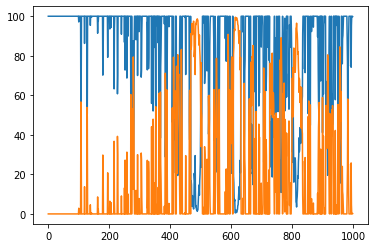

In [96]:
#print(explor_list)
plt.plot(x_list, explor_list)
plt.plot(x_list, explot_list)
plt.show() 